In [1]:
# Decision Tree Implementation for classification

# Data loading and Explorartion

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

print('--- 1. Data Loading and Exploration ---')

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

print("\n--- X (Features) Head ---")
print(X.head())

print("\n--- y (Target) Head ---")
print(y.head())

print("\n--- X Info ---")
print(X.info())

print("\n--- X Description ---")
print(X.describe())

print("\n--- Target Class Distribution ---")
print(y['species'].value_counts())

# Mapping target values to species names
target_names = {0: 'setosa', 1: 'versicolor', 2: 'verginica'}
y['species_name'] = y['species'].map(target_names)
print("\n--- y (Target) with Species Names Head ---")
print(y['species_name'].value_counts())

--- 1. Data Loading and Exploration ---

--- X (Features) Head ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

--- y (Target) Head ---
   species
0        0
1        0
2        0
3        0
4        0

--- X Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   15

In [2]:
# 2. Data Preprocessing

from sklearn.model_selection import train_test_split

print("\n---2. Data Preprocessing ---")

# Check for missing values
print("\n--- Missing Values in X ---")
print(X.isnull().sum())

print("\n--- Missing Values in y ---")
print(y.isnull().sum())


---2. Data Preprocessing ---

--- Missing Values in X ---
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

--- Missing Values in y ---
species         0
species_name    0
dtype: int64


In [3]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y['species'], test_size=0.3, random_state=42, stratify=y['species'])

print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"\nTesting set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (105, 4), y_train: (105,)

Testing set shape: X_test: (45, 4), y_test: (45,)


In [4]:
# 3. Decision tree modelling

from sklearn.tree import DecisionTreeClassifier

print("\n-- 3. Decision Tree Model Training ")

dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

print("\n--- Decision Tree Model Trained Successfully ---")


-- 3. Decision Tree Model Training 

--- Decision Tree Model Trained Successfully ---



--- 4. Model Evaluation ---

Accuracy Score:  0.933333

--- Confusion Matrix ---
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


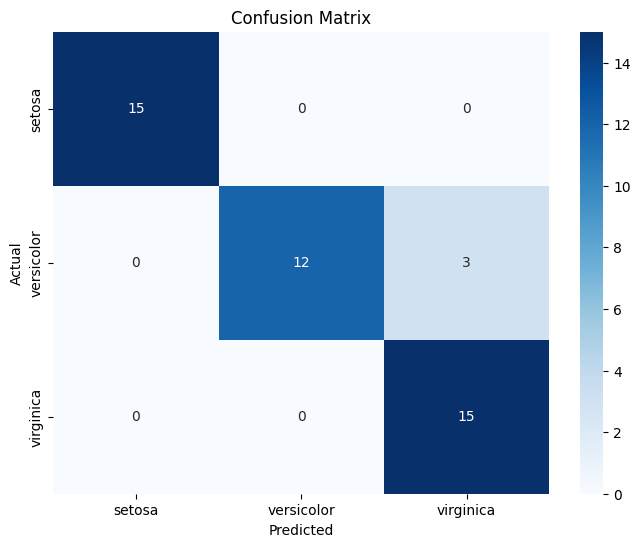


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [5]:
# 4. Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n--- 4. Model Evaluation ---")

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy: 4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\n--- Classification Report ---")
print(class_report)


--- 5. Decision Tree Visualization ---


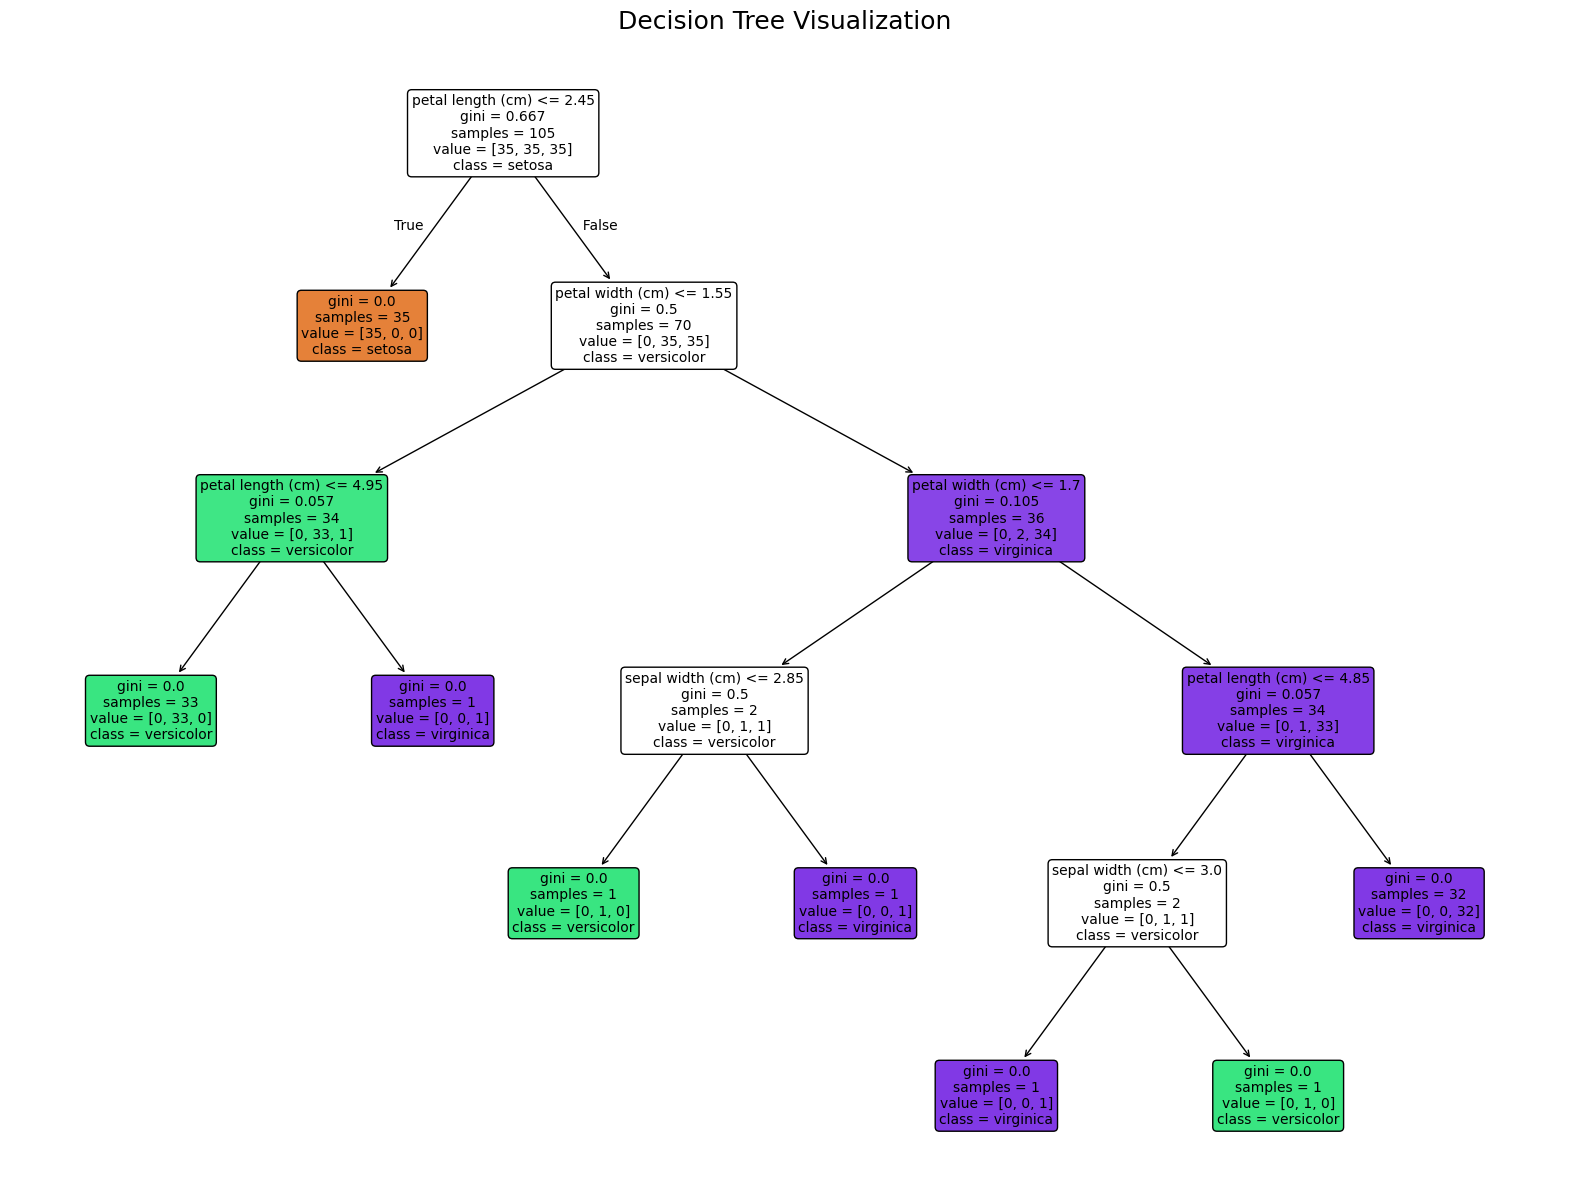


--- Interpreting the Decision Tree ---
Each node in the tree represents a decision based on a feature value.
The 'gini' impurity measures the quality of a split. The lower gini means a purer split.
'samples' indicates the number of samples in that node.
'value' shows the count of samples per class in that node.
'class' is the majority class in that node (the predicted class if this were a leaf node).

Follow the tree from the root to a leaf node to understand the decision path for a sample.
For example, if 'petal length (cm)' <= 2.45, it leads to a pure 'setosa' node.


In [6]:
# Tree visualization and interpretation

from sklearn.tree import plot_tree

print("\n--- 5. Decision Tree Visualization ---")

plt.figure(figsize=(20, 15))
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=18)
plt.savefig('decision_tree_visualization.png', bbox_inches='tight')
plt.show()

print("\n--- Interpreting the Decision Tree ---")
print("Each node in the tree represents a decision based on a feature value.")
print("The 'gini' impurity measures the quality of a split. The lower gini means a purer split.")
print("'samples' indicates the number of samples in that node.")
print("'value' shows the count of samples per class in that node.")
print("'class' is the majority class in that node (the predicted class if this were a leaf node).")
print("\nFollow the tree from the root to a leaf node to understand the decision path for a sample.")
print("For example, if 'petal length (cm)' <= 2.45, it leads to a pure 'setosa' node.")